### __Hotel Booking__ ###

Dataset ini terdiri dari 2 hotel yang berbeda. satu Resort Hotel dan satunya lagi City Hotel.

dilihat dari dokumen publikasi(https://www.sciencedirect.com/science/article/pii/S2352340918315191) kita tahu bahwa kedua hotel ini berada di Portugal (Eropa bagian Barat) (H1 berada di area resort Algarve dan H2 berada di kota Lisbon). jarak antara keduanya sekitar 280 km ditempuh dengan mobil dan keduanya berada di perbatasan atlantik utara.

Dataset terdiri "Bookings due to arrive between the 1st of July of 2015 and the 31st August 2017".


akan sangat membantu jika hotel bisa memperkirakan apakah pengunjung/tamu benar-benar datang, hal tersebut akan membantu pihak manajemen hotel untuk  mempersiapkan perencenaaan jumlah staff dan makanan yang dibutuhkan. mungkin juga bisa mengeluarkan kebijakan baru to make more money.


#### Keterangan Feature ####

- __hotel :__
    Hotel (H1 = Resort Hotel or H2 = City Hotel)
- __is_canceled :__
    Value indicating if the booking was canceled (1) or not (0)
- __lead_time__
    Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- __arrival_date_year__
    Year of arrival date
- __arrival_date_month__
    Month of arrival date
- __arrival_date_week_number__
    Week number of year for arrival date
- __arrival_date_day_of_month__
    Day of arrival date
- __stays_in_weekend_nights__
    Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- __stays_in_week_nights__
    Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- __adults__
    Number of adults
- __children__
    Number of children
- __babies__
    Number of babies
- __meal__
    Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- __country__
    Country of origin. Categories are represented in the ISO 3155–3:2013 format
- __market_segment__
    Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- __distribution_channel__
    Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- __is_repeated_guest__
    Value indicating if the booking name was from a repeated guest (1) or not (0)
- __previous_cancellations__
    Number of previous bookings that were cancelled by the customer prior to the current booking
- __previous_bookings_not_canceled__
    Number of previous bookings not cancelled by the customer prior to the current booking
- __reserved_room_type__
    Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- __assigned_room_type__
    Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- __booking_changes__
    Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- __deposit_type__
    Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- __agent__
    ID of the travel agency that made the booking
- __company__
    ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- __days_in_waiting_list__
    Number of days the booking was in the waiting list before it was confirmed to the customer
- __customer_type__
    Type of booking, assuming one of four categories:
    Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- __adr__
    Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- __required_car_parking_spaces__
    Number of car parking spaces required by the customer
- __total_of_special_requests__
    Number of special requests made by the customer (e.g. twin bed or high floor)
- __reservation_status__
    Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- __reservation_status_date__
    Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [54]:
# Packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import folium
import warnings
warnings.filterwarnings("ignore")
import numpy as np
# set display option:
sb.set(style= "whitegrid")

In [2]:
#Load Data

df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Chek Missing Values
percent= (df.isnull().sum().sort_values(ascending=False)/len(df)*100)
total= df.isnull().sum().sort_values(ascending=False)
# total

In [4]:
missing_data= pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data= missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


__which feature with blank or Nan Values?__

company(94 %) > agent(13%) > country (0.4%) > children(0.003%)

In [5]:
#see Categorical
df.describe(include=['O'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


__Distribusi Categorical Feature__
- hotel terdiri dari city hotel dan resort hotel dan yang paling banya adalah city hotel 
- arrival date month pada bulan agustus sebanyak 13877
- dari 5 category meal BB(bed &breakfast) merupakan top freq dengan jumlah 48590
- dari 177 negara yang ke-define, pengunjung paling banyak berasal dari portugal.
- top market segment adalah Online TA(Online Travel Agent)
- room type yang paling banyak di booking adalah room type A sebanyak 85994
- reservation_status_date paling banyak pada tanggal 2015-10-21 sebanyak 1461



In [6]:
df.describe(exclude=['O'])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
#see numerical
# df.describe(exclude=['O']).T

In [8]:
# berapa banyak yang cancel ?
total= df['is_canceled'].value_counts()
percent= (df['is_canceled'].value_counts()/len(df)*100)
cancel= pd.concat([total,percent],axis=1, keys=['Total','Percent'])
cancel

,Total,Percent
0,75166,62.958372
1,44224,37.041628


sebanyak 44.224 pengunjung (37%)  melakukan cancelation. featur ini adalah variable dependent jika nnati ingin melakukan prediksi

In [9]:
#perbandingan City hotel dan resort hotel
total=(df['hotel'].value_counts())
persen= (df['hotel'].value_counts()/len(df)*100)
hotel= pd.concat([total,persen], axis=1, keys=['Total','Percent'])
hotel

,Total,Percent
City Hotel,79330,66.446101
Resort Hotel,40060,33.553899


In [10]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

In [11]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [12]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [13]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [14]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

#### Berdasarkan data analysis maka dapat kita asumsikan beberapa hal berikut : ####

__Correlating.__

mengetahui korelasi antara target dan feature. jadi nanti bisa menentukan fitur mana yang paling berpengaruh dan bisa dijadikan untuk model

__Completing.__

fitur mana saja yang akan dilengkapi Nan values nya.
- Company
- Agent
- Country
- children

__Correcting.__

1. agent : jika tidak ada agency yang terdaftar kemungkinan pengunjung chek in tanpa agen
2. company : kemungkinan data yang Nan ini mereka chek in secara private
3. meal : equal dan SC merupakan satu categori, jadi nanti bisa digabung/replace saja
4. children : kemungkinan tidak ada pengunjung anak-anak
5. country : bisa di replace dengan Unknown, jika nanti masusk model didrop saja, karena banyak nan values


__Creating.__
1. bisa bikin variable baru gabungan antara children, babies, adult. jika ketiganya berisi 0 berarti tidak ada pengunjung. bisa kita drop.

In [15]:
#Replace Missing Values :
nan_replacement = {"children": 0,"country":"Unknown","agent":0,"company":0}

df= df.fillna(nan_replacement)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [17]:
#Unite Undifined dengan SC yang ada di fitur meal

df['meal'].replace("Undefined", "SC", inplace=True)

df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [18]:
zero_guest = list(df.loc[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df.drop(df.index[zero_guest], inplace=True)

In [19]:
df.shape

(119210, 32)

#### 1. EDA ####

Question to answer from the data:
- where do the guests come from?
- how much do guests pay for a room per night?
- How does the price per night vary over the year?
- which are the most busy month?
- how long do people stay at hotels?
- how many bookings were canceled?
- which month have the highest number of cancelations?

NB: untuk menjawab beberapa pertanyaan diatas, akan menggunakan data yang not canceled, untuk mendapatkan data tamu yang sebenarnya. 

karena ini di dataran eropa maka kedepannya akan sering menggunakan musim sebagai acuan:
- __spring__ :pertengahan Februari hingga Mei
- __summer__ : tanggal 20 Juni hingga tanggal 21-22 September
- __autumn__ : bulan September hingga permulaan musim dingin pada akhir November atau awal Desember
- __winter__ :bulan Desember hingga Februari


__where do the guests come from ?__

In [20]:
country_data= pd.DataFrame(df.loc[df['is_canceled']==0]['country'].value_counts())
country_data.index.name='country'
country_data.rename(columns={"country":"Number of Guests"},inplace=True)
total_guest= country_data['Number of Guests'].sum()
country_data['Guest in %']= round(country_data['Number of Guests']/total_guest*100,2)
country_data.head(10)

,Number of Guests,Guest in %
country,,
PRT,20977,27.97
GBR,9668,12.89
FRA,8468,11.29
ESP,6383,8.51
DEU,6067,8.09
IRL,2542,3.39
ITA,2428,3.24
BEL,1868,2.49
NLD,1716,2.29


5 negara asal teratas adalah  portugal, united kingdom, france , Spain, Germany

__How Much do Guests pay for a room per night?__

kedua hotel tersebut memiliki perbedaan type kamar dan meal(sajian makanan). faktor musim juga mempengaruhi, jadi variasi harganya sangat banyak. mari kita berasumsi kalau harganya dalam satuan mata uang EUR

asumme jika babies tidak membayar

In [21]:
rh= df[df['hotel']=='Resort Hotel']
ch= df[df['hotel']=='City Hotel']
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

print("from all non-canceled bookings, across all room types and meals, Rata-Rata Harganya sebagai berikut: \n Resort hotel:",round(rh['adr_pp'].mean(),2)," € per night and person. \n City hotel:",round(ch['adr_pp'].mean(),2)," € per night and person." )

from all non-canceled bookings, across all room types and meals, Rata-Rata Harganya sebagai berikut: 
 Resort hotel: 48.48  € per night and person. 
 City hotel: 58.49  € per night and person.


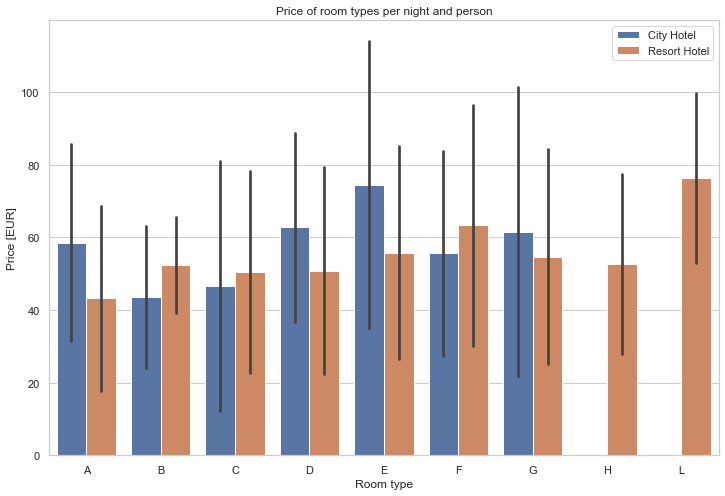

In [22]:
#normalize price per night (adr) only actual guests(without cancellations reservations)

df['adr_pp']= df['adr']/(df['adults']+df['children'])
guestreal= df.loc[df['is_canceled']==0]
room_prices= guestreal[['hotel','reserved_room_type','adr_pp']].sort_values('reserved_room_type')

# room_prices

#barplot with standard deviation
plt.figure(figsize=(12,8))
sb.barplot(x='reserved_room_type', y='adr_pp',hue='hotel', data=room_prices, hue_order=['City Hotel','Resort Hotel'], ci='sd')
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.title("Price of room types per night and person")
plt.legend(loc='upper right')



__How does the proce per night vary over the year?__

saya menggunakan rata-rata harga per night and person, terlepas dari jenis kamar dan meal nya.

Text(0, 0.5, 'Price [EUR]')

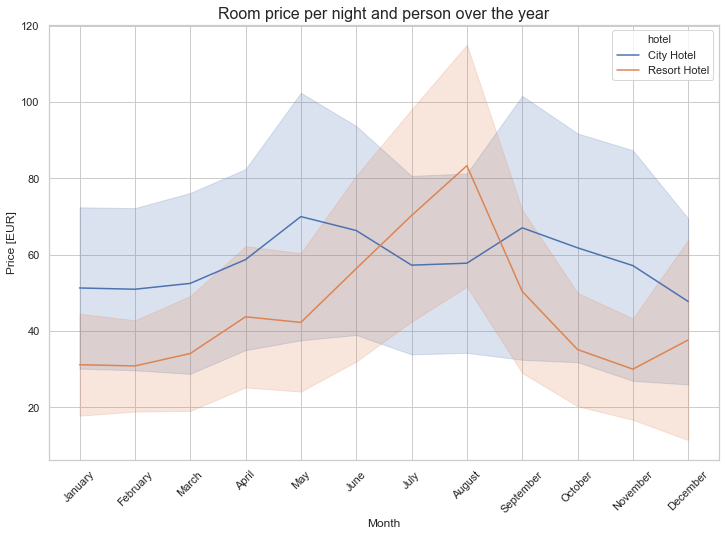

In [23]:
#grab the data:
room_monthly= guestreal[['hotel','arrival_date_month','adr_pp']].sort_values('arrival_date_month')


#order by month:
month=['January','February','March','April','May','June','July','August','September','October','November','December']
room_monthly['arrival_date_month']= pd.Categorical(room_monthly['arrival_date_month'], categories=month, ordered= True)

#barplot with standard deviation:
plt.figure(figsize=(12,8))
sb.lineplot(x='arrival_date_month', y='adr_pp', hue='hotel', data=room_monthly, hue_order=['City Hotel','Resort Hotel'], ci= 'sd')
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]")


- harga kamar Resort Hotel mengalami kenaikan significant pada bulan agustus(during summer).
- sedangka pada city hotel cenderung varies less serta paling mahal pada bulan May(Autumn) dan september(Spring)

__which are the busy month ?__

In [24]:
tamu_resort_bulan= rh.groupby("arrival_date_month")['hotel'].count()
tamu_city_bulan= ch.groupby("arrival_date_month")['hotel'].count()


- bulan agustus dan bulan July memiliki jumlah pengunjung yang perbedaannya terlalu significant. coba cek.

In [25]:
# agustus=df[df['arrival_date_month']=='August']
# agustus.describe()['arrival_date_year']
print(df[df['arrival_date_month']=='August']['arrival_date_year'].min())
print(df[df['arrival_date_month']=='August']['arrival_date_year'].max())


2015
2017


In [26]:
# july=df[df['arrival_date_month']=='July']
# july.describe()['arrival_date_year']

print(df[df['arrival_date_month']=='July']['arrival_date_year'].min())
print(df[df['arrival_date_month']=='July']['arrival_date_year'].max())

2015
2017


In [27]:
# January=df[df['arrival_date_month']=='January'].min
# January.describe()['arrival_date_year']
print('januari :',df[df['arrival_date_month']=='January']['arrival_date_year'].min())
print('januari :',df[df['arrival_date_month']=='January']['arrival_date_year'].max())

print('April :',df[df['arrival_date_month']=='April']['arrival_date_year'].min())
print('April :',df[df['arrival_date_month']=='April']['arrival_date_year'].max())

januari : 2016
januari : 2017
April : 2016
April : 2017


- ternyata bulan july dan bulan agustus nya 3 tahun sedangkan bulan lainnya hanya 2 tahun, jadi nanti jumlah pengunjung perbulannya dibagi dengan sejumlah tahun yang dilewati

Text(0, 0.5, 'Number of guests')

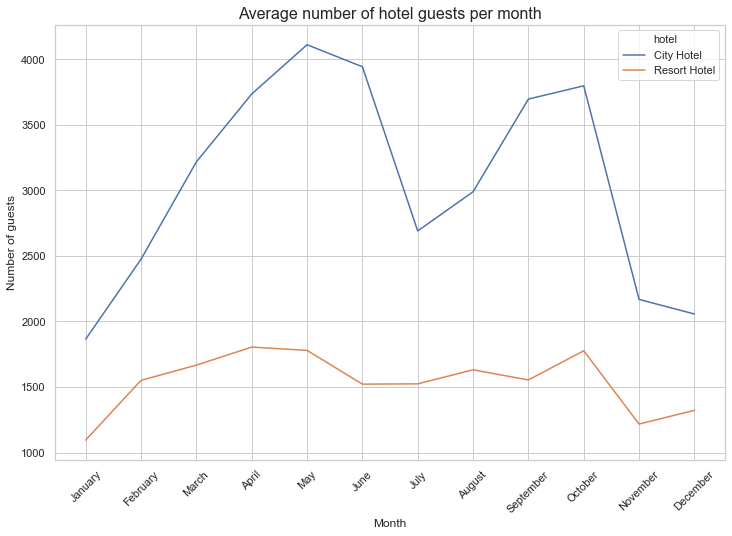

In [28]:
resort_data= pd.DataFrame({"month":list(tamu_resort_bulan.index),"hotel":"Resort Hotel","guests":list(tamu_resort_bulan.values)})
city_data= pd.DataFrame({"month":list(tamu_city_bulan.index),"hotel":"City Hotel","guests":list(tamu_city_bulan.values)})

full_guest_data= pd.concat([resort_data,city_data], ignore_index=True)

#order by month
month=['January','February','March','April','May','June','July','August','September','October','November','December']
full_guest_data['month']= pd.Categorical(full_guest_data['month'], categories=month, ordered=True)

#Normalize Data: 3 years and 2 years
full_guest_data.loc[(full_guest_data['month']=='July')|(full_guest_data['month']=="August"),'guests']/=3
full_guest_data.loc[~((full_guest_data['month']=='July')|(full_guest_data['month']=="August")),'guests']/=2
full_guest_data

plt.figure(figsize=(12,8))
sb.lineplot(x="month", y="guests", hue='hotel', data=full_guest_data, hue_order=['City Hotel','Resort Hotel'])
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of guests")

- city hotel menerima tamu paling banyak pada bulan May-Juni(Autumn) or september-oktober(spring) yang dimana harga perkamar pada bulan ini juga yang paling tinggi
- city hotel: july dan agustus juga yang paling sepi pengunjung dimana pada bulan tersebut harganya juga turun

- Resort hotel : pada bulan juni sampai september megalami penurunan pengunjung, yang dimana harganya tertinggi.




__How Long do people stay at the hotels?__


In [29]:
#creating dataframe with relevant data :
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())

bookings_res= rh['total_nights'].value_counts()/sum(num_bookings_res)*100

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
bookings_city= ch['total_nights'].value_counts()/sum(num_bookings_cty)*100

res_nights= pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "num_bookings": bookings_res})
res_nights

city_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "num_bookings": bookings_city})
city_nights

night_data= pd.concat([res_nights,city_nights], ignore_index=True)
night_data

,hotel,num_nights,num_bookings
0,Resort hotel,1,19.344770
1,Resort hotel,7,16.468150
2,Resort hotel,2,15.524259
3,Resort hotel,3,14.215796
4,Resort hotel,4,12.050840
...,...,...,...
68,City hotel,33,0.002526
69,City hotel,23,0.002526
70,City hotel,25,0.002526
71,City hotel,34,0.001263


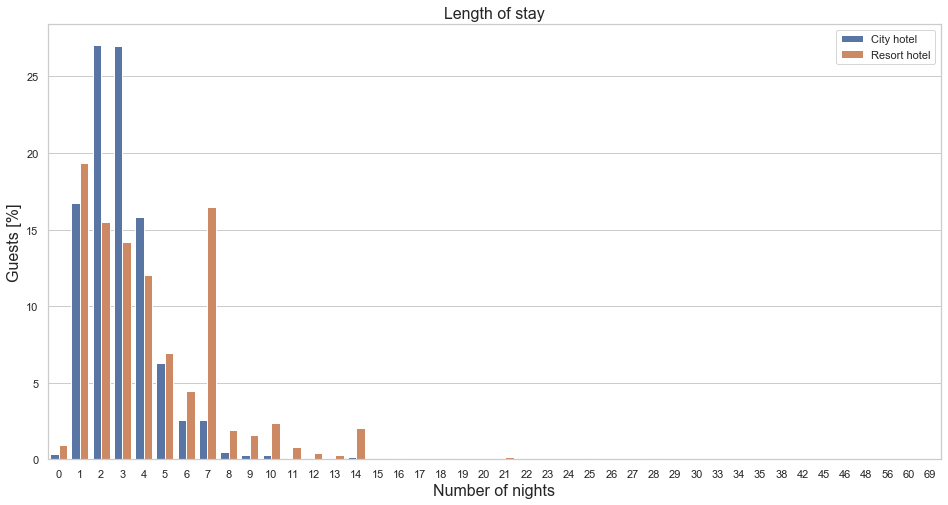

In [30]:
plt.figure(figsize=(16, 8))
sb.barplot(x = "num_nights", y = "num_bookings", hue="hotel", data=night_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")

In [31]:
avg_night_res=int(sum((res_nights['num_nights']*(res_nights['num_bookings']/100)).values))
avg_night_res

avg_night_city= round(sum(city_nights['num_nights']*(city_nights['num_bookings']/100)))
avg_night_city

print("rata-rata orang menginap di Resort hotel selama :",avg_night_res,"malam dan yang paling lama menginap selama :",res_nights['num_nights'].max(),"malam")
print("rata-rata orang menginap di City hotel selama :",avg_night_city,"malam dan yang paling lama menginap selama :",city_nights['num_nights'].max(),'malam')

rata-rata orang menginap di Resort hotel selama : 4 malam dan yang paling lama menginap selama : 69 malam
rata-rata orang menginap di City hotel selama : 3 malam dan yang paling lama menginap selama : 48 malam


City Hotel paling banyak pengunjung menginap selama 1-4 malam. seddangkan untuk Resort Hotel pengunjung paling banyak menginap selama 1-4 malam. akan tetapi banyak juga pengunjung yang menginap selama 7 hari.

__How Many Bookings were canceled?__

In [32]:
# berapa banyak yang benar-benar melakukan pembatalan reservasi?
total_cancel= df['is_canceled'].sum()
total_cancel

rh_cancel= df[df['hotel']=="Resort Hotel"]['is_canceled'].sum()
rh_cancel

ch_cancel= df[df['hotel']=='City Hotel']['is_canceled'].sum()
ch_cancel

# in percent
cancel= total_cancel/len(df)*100
cancel
rh_cancel_per= rh_cancel/len(df[df['hotel']=='Resort Hotel'])*100
rh_cancel_per

ch_cancel_per= ch_cancel/len(df[df['hotel']=="City Hotel"])*100
ch_cancel_per

print("total reservasi yang dibatalkan sejumlah",total_cancel,'(',int(cancel),'% )')
print("reservasi Resort Hotel yang dibatalkan sejumlah",rh_cancel,'(',int(rh_cancel_per),'% )')
print("reservasi City Hotel yang dibatalkan sejumlah",ch_cancel,'(',int(ch_cancel_per),'% )')

total reservasi yang dibatalkan sejumlah 44199 ( 37 % )
reservasi Resort Hotel yang dibatalkan sejumlah 11120 ( 27 % )
reservasi City Hotel yang dibatalkan sejumlah 33079 ( 41 % )


__Which Month have the highest number cancelations?__

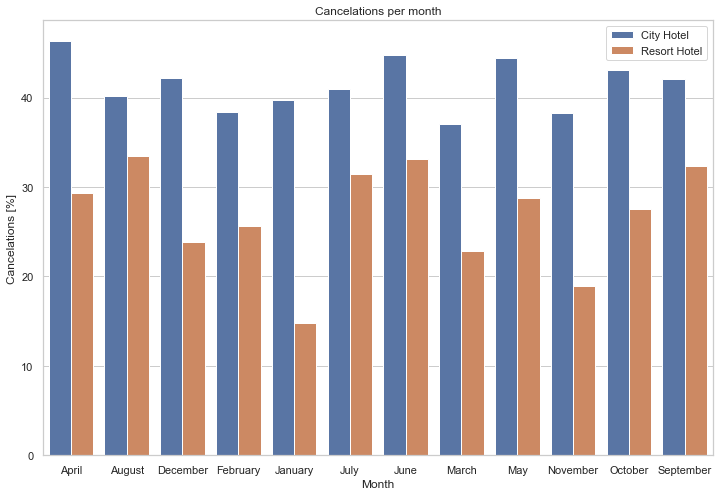

In [33]:
#membuat dataframe baru yang berisi data-data yang relevan

res_book_per_month= df.loc[(df['hotel']=="Resort Hotel")].groupby("arrival_date_month")['hotel'].count()
res_book_per_month

city_book_per_month= df.loc[(df['hotel']=="City Hotel")].groupby("arrival_date_month")['hotel'].count()
city_book_per_month

res_cancel_per_month= df.loc[(df['hotel']=="Resort Hotel")].groupby("arrival_date_month")['is_canceled'].sum()
city_cancel_per_month= df.loc[(df['hotel']=='City Hotel')].groupby("arrival_date_month")['is_canceled'].sum()
# print(city_book_per_month)
# print(city_cancel_per_month)

res_cancel_data= pd.DataFrame({'Hotel':"Resort Hotel",
                               "Month": (res_book_per_month.index),
                               "Bookings":(res_book_per_month.values),
                               "Cancellation":(res_cancel_per_month.values)})
# res_cancel_data
city_cancel_data= pd.DataFrame({'Hotel':"City Hotel",
                               "Month": (city_book_per_month.index),
                               "Bookings":(city_book_per_month.values),
                               "Cancellation":(city_cancel_per_month.values)})
city_cancel_data

full_cancel_data= pd.concat([res_cancel_data,city_cancel_data],ignore_index=True)
full_cancel_data['Percent']= full_cancel_data['Cancellation']/full_cancel_data['Bookings']*100

month=['January','February','March','April','May','June','July','August','September','October','November','December']
# full_cancel_data['Month']=pd.Categorical(full_cancel_data['Month'], categories=month, ordered=True)
full_cancel_data

plt.figure(figsize=(12,8))
sb.barplot(x="Month", y='Percent', hue='Hotel',data=full_cancel_data, hue_order=['City Hotel','Resort Hotel'])
plt.title("Cancelations per month")
plt.xlabel("Month")
plt.ylabel("Cancelations [%]")
plt.legend(loc="upper right")




untuk City Hotel pengunjung yang melakukan pembatalan reservasi sekitar 40% tiap bulannya.
sedangkan untuk Resort Hotel paling tinggi pada bulan Agustus dan Juni (Summer)

#### __2. Predict Cancellations__

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
def evaluation(x,y):
    print(classification_report(x,y))
    cm = confusion_matrix(x,y)
    sb.heatmap(pd.DataFrame(cm),annot=True, cmap="BuPu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

which features are most important?
sebelum melihat correlation, converting beberapa categorical feature terlebih dahulu.

In [35]:
#treatment categorical feature

df['hotel']=df['hotel'].map({'Resort Hotel':1,'City Hotel':2}).astype(int)
df['arrival_date_month']=df['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}).astype(int)
df['meal']=df['meal'].map({'BB':1,'FB':2,'HB':3,'SC':4}).astype(int)
df['market_segment']=df['market_segment'].map({'Direct':1, 'Corporate':2, 'Online TA':3, 'Offline TA/TO':4,'Complementary':5, 'Groups':6, 'Undefined':7, 'Aviation':8}).astype(int)
df['distribution_channel']=df['distribution_channel'].map({'Direct':1, 'Corporate':2, 'TA/TO':3, 'Undefined':4, 'GDS':5}).astype(int)
df['reserved_room_type']=df['reserved_room_type'].map({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8,"L":9}).astype(int)
df['deposit_type']=df['deposit_type'].map({'No Deposit':1, 'Refundable':2, 'Non Refund':3}).astype(int)
df['customer_type']=df['customer_type'].map({'Transient':1, 'Contract':2, 'Transient-Party':3, 'Group':4}).astype(int)


In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,1,0,342,2015,7,27,1,0,0,2,...,0.0,0.0,0,1,0.0,0,0,Check-Out,2015-07-01,0.0
1,1,0,737,2015,7,27,1,0,0,2,...,0.0,0.0,0,1,0.0,0,0,Check-Out,2015-07-01,0.0
2,1,0,7,2015,7,27,1,0,1,1,...,0.0,0.0,0,1,75.0,0,0,Check-Out,2015-07-02,75.0
3,1,0,13,2015,7,27,1,0,1,1,...,304.0,0.0,0,1,75.0,0,0,Check-Out,2015-07-02,75.0
4,1,0,14,2015,7,27,1,0,2,2,...,240.0,0.0,0,1,98.0,0,1,Check-Out,2015-07-03,49.0


In [39]:
cancel_corr= df.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
deposit_type                      0.480483
lead_time                         0.292876
market_segment                    0.238372
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
distribution_channel              0.169718
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.135986
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
reserved_room_type                0.062216
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
adr_pp                            0.017808
arrival_date_year                 0.016622
meal       

10 feature yang memiliki korelasi relatif tinggi dibandingkan yang lainnya for numerical feature adalah 
- lead_time,
- previous_cancellations,
- total_of_special_request_
- required_car_perking_space
- booking_changes
- customer type
- hotel
- distribution_channel  
- deposit_type   
- market_segment                    



akan tetapi jika dilihat pada proses sebelumnya timing juga mempengaruhi. see(EDA again). 

jadi akan memilih feature secara manual yang sekiranya akan memberikan pengaruh.


In [41]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

#treatment categorical feature

dfbaru= df[num_features + cat_features].copy()
dfbaru.head()
y= df['is_canceled']

#Splitting Data Test= 20%
xtr,xts,ytr,yts= train_test_split(dfbaru,y, random_state=42, test_size=.2)


__Random Forest__

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     16029
           1       0.77      0.87      0.81      7813

    accuracy                           0.87     23842
   macro avg       0.85      0.87      0.86     23842
weighted avg       0.88      0.87      0.87     23842



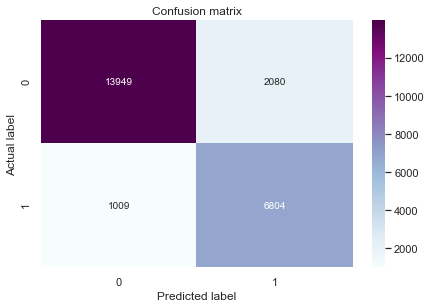

In [48]:
forest= RandomForestClassifier()
forest.fit(xtr,ytr)
predikforest= forest.predict(xts)

evaluation(predikforest,yts)

__Logistic Regression__

              precision    recall  f1-score   support

           0       0.92      0.76      0.83     17982
           1       0.52      0.78      0.62      5860

    accuracy                           0.77     23842
   macro avg       0.72      0.77      0.73     23842
weighted avg       0.82      0.77      0.78     23842



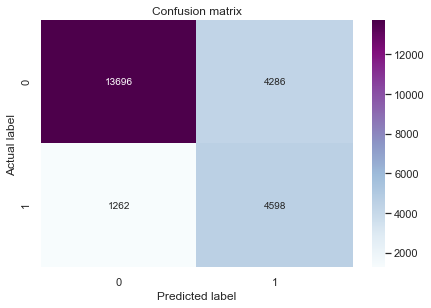

In [50]:
logis= LogisticRegression()
logis.fit(xtr,ytr)
prediksi= logis.predict(xts)

evaluation(prediksi,yts)

__Support Vector Clasiffication__

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     20319
           1       0.35      0.87      0.49      3523

    accuracy                           0.74     23842
   macro avg       0.66      0.79      0.66     23842
weighted avg       0.88      0.74      0.77     23842



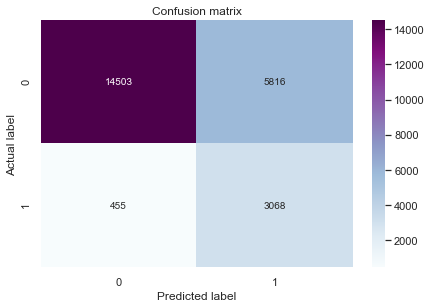

In [52]:
svc= SVC()
svc.fit(xtr,ytr)
predict= svc.predict(xts)

evaluation(predict,yts)

__Tuning Random Forest__

In [57]:
# Number of trees in random forest
n_estimators = np.arange(100,400,100)
# Maximum number of levels in tree
max_depth = [10,20,30, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
              }
BestParamsforest= GridSearchCV(forest, random_grid, cv=2, n_jobs= -1, verbose=1)
BestParamsforest.fit(xtr,ytr)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 22.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     16028
           1       0.76      0.87      0.81      7814

    accuracy                           0.87     23842
   macro avg       0.85      0.87      0.86     23842
weighted avg       0.88      0.87      0.87     23842



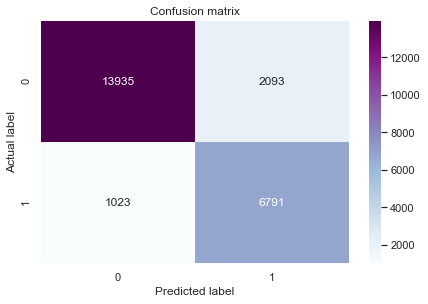

In [58]:
prediksi= BestParamsforest.predict(xts)

evaluation(prediksi,yts)